### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
data=pd.read_csv('/content/sample_data/train.csv',sep=',')

In [3]:
data.head(2)

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox


In [4]:
data.shape

(37500, 19)

In [5]:
#Knowing about types and missing percentage of each column
dtypes=pd.DataFrame(data.dtypes,columns=['dtypes'])
d_missin=pd.DataFrame(data.isnull().mean(),columns=['missin_per'])
missn=pd.concat([dtypes,d_missin],axis=1)
missn.sort_values(by='missin_per',ascending=False)

,dtypes,missin_per
user/birthdayUnix,float64,0.790507
user/birthdayRaw,object,0.790507
user/ageInSeconds,float64,0.790507
user/gender,object,0.591627
review/text,object,0.000267
user/profileName,object,0.000133
review/taste,float64,0.000000
review/timeUnix,int64,0.000000
review/timeStruct,object,0.000000
index,int64,0.000000


In [6]:
for col in missn[(missn['dtypes']=='object') ].index:
    print(col+"----------")
    print(data[col].unique())
    print(len(data[col].unique()))

beer/name----------
['Chiostro' "Bearded Pat's Barleywine" "Naughty Nellie's Ale" ...
 'Pszeniczne' 'Cauldron Brew' 'MoJo Belgian Style Abbey Dubbel']
1688
beer/style----------
['Herbed / Spiced Beer' 'American Barleywine' 'American Pale Ale (APA)'
 'Czech Pilsener' 'English Pale Ale' 'Russian Imperial Stout'
 'American Wild Ale' 'Pumpkin Ale' 'English Barleywine' 'American IPA'
 'Scotch Ale / Wee Heavy' 'American Double / Imperial Stout'
 'Euro Pale Lager' 'Maibock / Helles Bock' 'American Amber / Red Ale'
 'Rye Beer' 'American Double / Imperial IPA' 'MÃ¤rzen / Oktoberfest'
 'Fruit / Vegetable Beer' 'Witbier' 'Light Lager' 'Rauchbier'
 'American Porter' 'Hefeweizen' 'Extra Special / Strong Bitter (ESB)'
 'Wheatwine' 'English Strong Ale' 'Braggot' 'Euro Strong Lager'
 'Munich Helles Lager' 'English India Pale Ale (IPA)' 'Altbier'
 'Doppelbock' 'American Brown Ale' 'Munich Dunkel Lager' 'Irish Dry Stout'
 'KÃ¶lsch' 'Foreign / Export Stout' 'Cream Ale' 'Lambic - Unblended'
 'Scottish Ale

### EDA

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


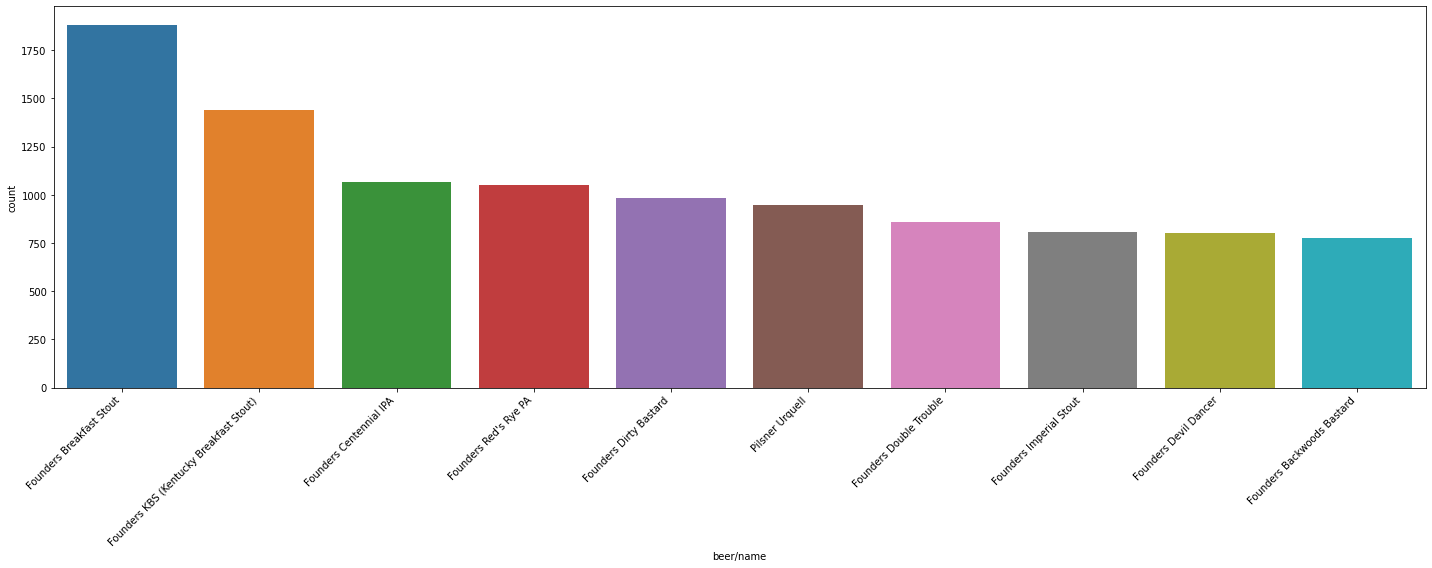

In [7]:
fig = plt.gcf()
fig.set_size_inches(20,8)
ax=sns.countplot('beer/name',data=data,order=data['beer/name'].value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


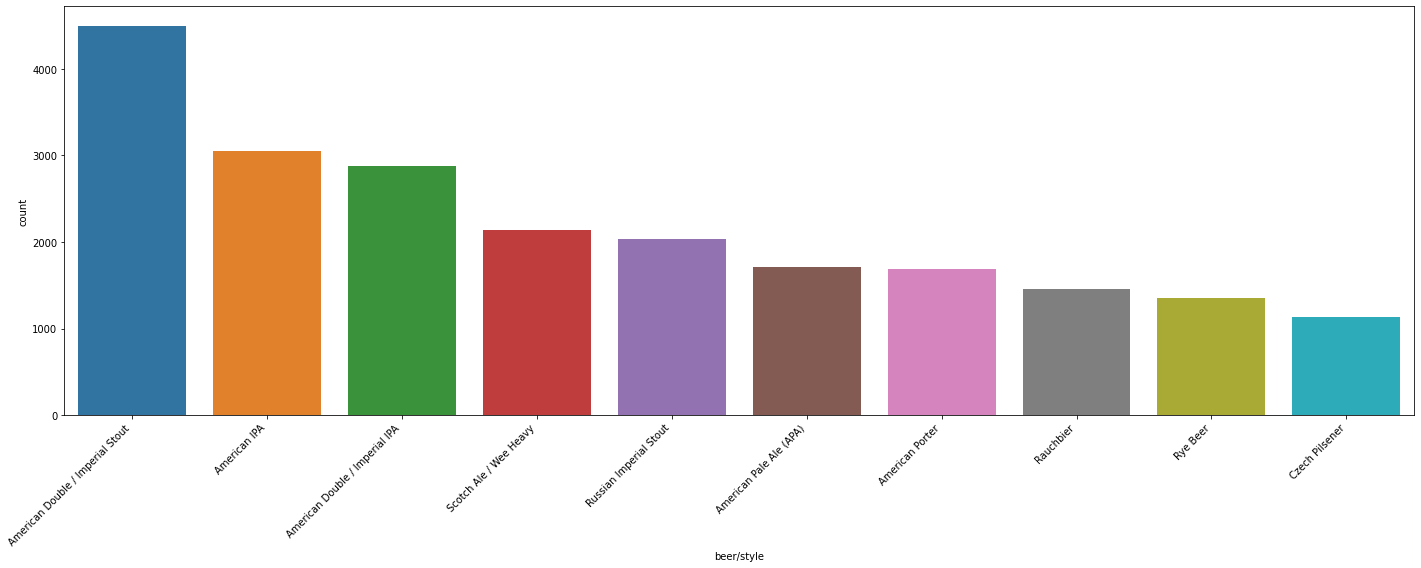

In [8]:
fig = plt.gcf()
fig.set_size_inches(20,8)
ax=sns.countplot('beer/style',data=data,order=data['beer/style'].value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


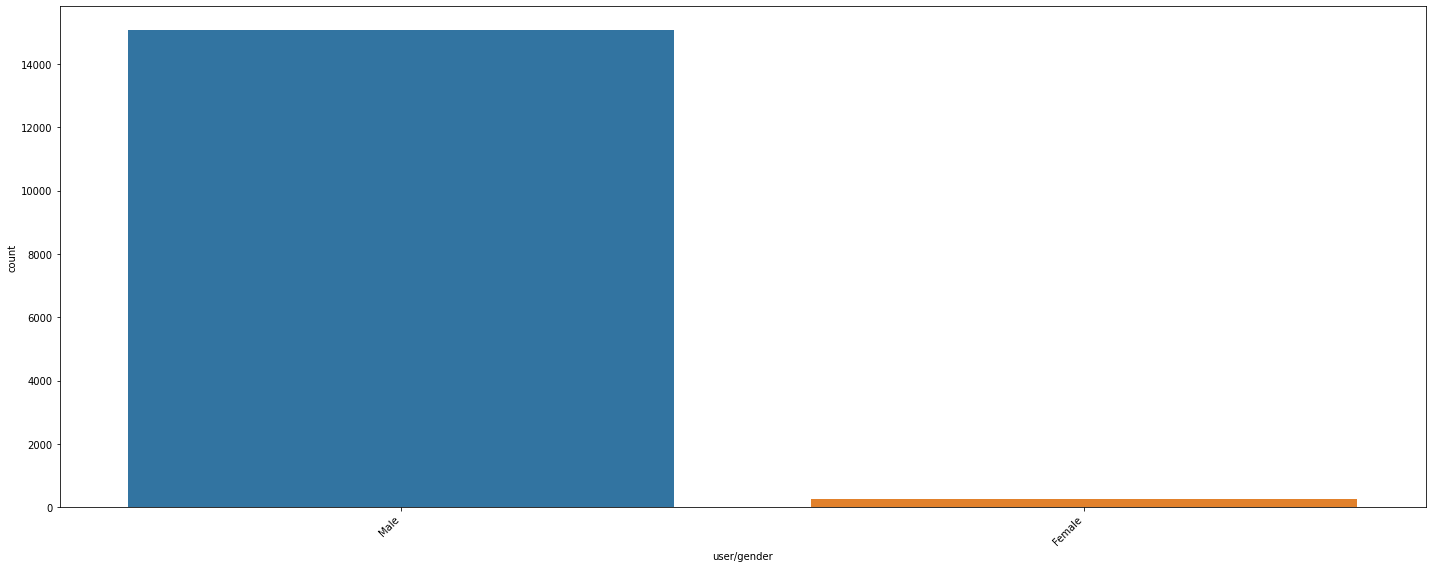

In [9]:
fig = plt.gcf()
fig.set_size_inches(20,8)
ax=sns.countplot('user/gender',data=data,order=data['user/gender'].value_counts().iloc[:10].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

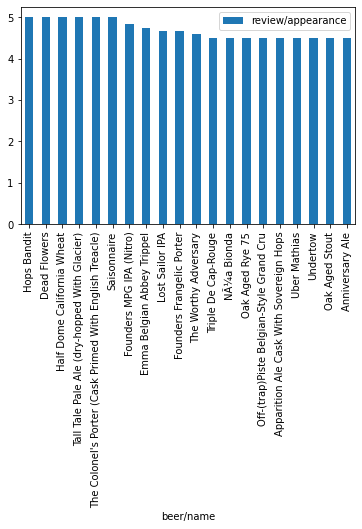

In [10]:
var_v=pd.DataFrame(data.groupby('beer/name')['review/appearance'].mean())
var_v=var_v.sort_values(by='review/appearance',ascending=False)
var_v=var_v.head(20)
var_v.plot.bar()
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 152 missing from current font.
  font.set_text(s, 0, flags=flags)


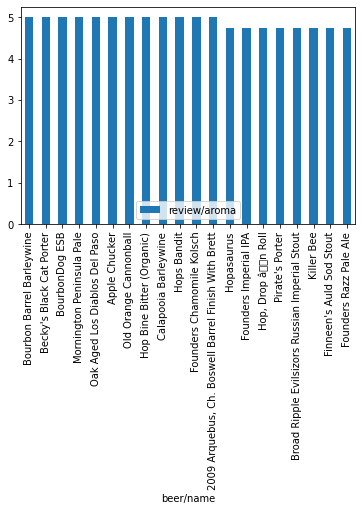

In [11]:
var_v=pd.DataFrame(data.groupby('beer/name')['review/aroma'].mean())
var_v=var_v.sort_values(by='review/aroma',ascending=False)
var_v=var_v.head(20)
var_v.plot.bar()
plt.show()

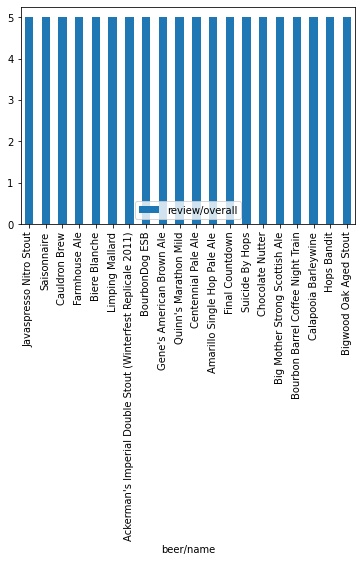

In [12]:
var_v=pd.DataFrame(data.groupby('beer/name')['review/overall'].mean())
var_v=var_v.sort_values(by='review/overall',ascending=False)
var_v=var_v.head(20)
var_v.plot.bar()
plt.show()

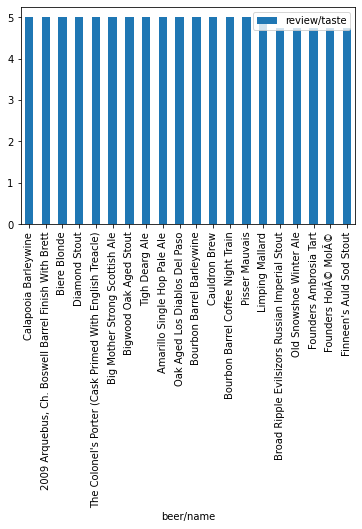

In [13]:
var_v=pd.DataFrame(data.groupby('beer/name')['review/taste'].mean())
var_v=var_v.sort_values(by='review/taste',ascending=False)
var_v=var_v.head(20)
var_v.plot.bar()
plt.show()

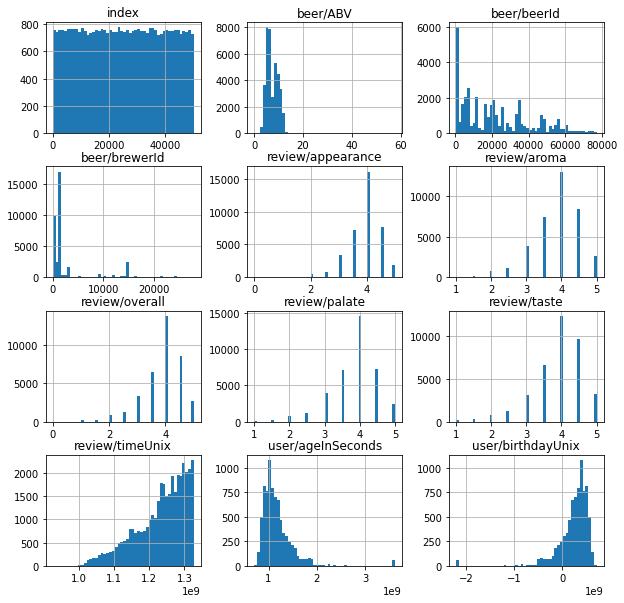

In [14]:
data.hist(bins=50, figsize=(10,10))
plt.show()

### Feature Engineering

In [47]:
data['user/ageInSeconds']=data['user/ageInSeconds'].fillna(data['user/ageInSeconds'].mean())

In [48]:
365*24*60*60

31536000

In [49]:
data['age']=data['user/ageInSeconds']/31536000

In [50]:
data['age']=abs(data['age'].astype(int))

### Data Pre-processing


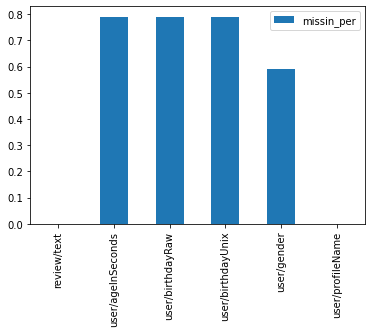

In [15]:
#plotting missing values
missn[missn['missin_per']>0].plot.bar()

In [16]:
data.shape

(37500, 19)

In [17]:
threshold = 0.7
#Dropping columns with missing value rate higher than threshold
data = data[data.columns[data.isnull().mean() < threshold]]

#Dropping rows with missing value rate higher than threshold
data = data.loc[data.isnull().mean(axis=1) < threshold]

In [18]:
data.columns

Index(['index', 'beer/ABV', 'beer/beerId', 'beer/brewerId', 'beer/name',
       'beer/style', 'review/appearance', 'review/aroma', 'review/overall',
       'review/palate', 'review/taste', 'review/text', 'review/timeStruct',
       'review/timeUnix', 'user/gender', 'user/profileName'],
      dtype='object')

In [19]:
#Knowing about types and missing percentage of each column
dtypes=pd.DataFrame(data.dtypes,columns=['dtypes'])
d_missin=pd.DataFrame(data.isnull().mean(),columns=['missin_per'])
missn=pd.concat([dtypes,d_missin],axis=1)
missn.sort_values(by='missin_per',ascending=False)

,dtypes,missin_per
user/gender,object,0.591627
review/text,object,0.000267
user/profileName,object,0.000133
index,int64,0.000000
beer/ABV,float64,0.000000
beer/beerId,int64,0.000000
beer/brewerId,int64,0.000000
beer/name,object,0.000000
beer/style,object,0.000000
review/appearance,float64,0.000000


In [20]:
#missing categorical
missn_cat=missn[(missn['missin_per']>0)&(missn['dtypes']=='object') ].index
missn_cat

Index(['review/text', 'user/gender', 'user/profileName'], dtype='object')

In [21]:
#missing numerical 
missn_numerical=missn[(missn['missin_per']>0)&(missn['dtypes']!='object') ].index
missn_numerical

Index([], dtype='object')

In [22]:
!pip install feature_engine

In [23]:
#Handling missing categorical 
from feature_engine import missing_data_imputers as mdi
imputer = mdi.CategoricalVariableImputer(imputation_method='frequent')
data[['user/gender', 'user/profileName']]=imputer.fit_transform(data[['user/gender', 'user/profileName']])

In [24]:
imputer = mdi.CategoricalVariableImputer(imputation_method='missing')
data[['review/text']]=imputer.fit_transform(data[['review/text']])

In [25]:
data.isna().sum()

index                0
beer/ABV             0
beer/beerId          0
beer/brewerId        0
beer/name            0
beer/style           0
review/appearance    0
review/aroma         0
review/overall       0
review/palate        0
review/taste         0
review/text          0
review/timeStruct    0
review/timeUnix      0
user/gender          0
user/profileName     0
dtype: int64

In [26]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
# Cleaning the texts
corpus = []
ps = PorterStemmer()
for i in range(0, data.shape[0]):
    review = re.sub(r'\W', ' ', data['review/text'][i])
    review = review.lower()
    review = re.sub(r'\s+[a-z]\s+', ' ', review)
    review = re.sub(r'^[a-z]\s+', ' ', review)
    review = re.sub(r'\s+', ' ', review)
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [28]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,min_df=3,max_df=0.6)
X0 = cv.fit_transform(corpus).toarray()


In [29]:
summ=cv.fit_transform(corpus).sum(axis=0)
wrd_freq=[(w,summ[0,idx])for w,idx in cv.vocabulary_.items()]
words_freq =sorted(wrd_freq, key = lambda x: x[1], reverse=True)
words_freq[:10]

[('hop', 35737),
 ('malt', 33063),
 ('sweet', 29888),
 ('flavor', 28799),
 ('nice', 27553),
 ('like', 24905),
 ('good', 23788),
 ('smell', 22320),
 ('bitter', 22182),
 ('one', 21708)]

In [30]:
#transforming Bag of words model to TFIDF model
from sklearn.feature_extraction.text import TfidfTransformer
trnsformer=TfidfTransformer()
X0=trnsformer.fit_transform(X0).toarray()

In [31]:
#encoding categorical variables
data_model_1=pd.get_dummies(data.drop(['user/ageInSeconds','review/text','index','beer/beerId','beer/brewerId','review/timeStruct','review/timeUnix'],axis=1) ,drop_first=True)

In [32]:
cl=np.array(cv.get_feature_names()).reshape(-1)

In [33]:
data_model_2=pd.DataFrame(X0,columns=cl)

In [34]:
X=pd.concat([data_model_1,data_model_2],axis=1,ignore_index=True)

In [35]:
y = data.iloc[:, 8].values

### Modelling and Validation metrics

In [36]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [37]:
# fitting train data to the regression
from sklearn.linear_model import LinearRegression

regressor= LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
# making predictions
y_pred = regressor.predict(X_test)
pred_real=pd.DataFrame(columns=['y_pred','y_test'])
pred_real['y_pred']=np.array(y_pred).reshape(-1)
pred_real['y_test']=np.array(y_test).reshape(-1)
pred_real.head()

,y_pred,y_test
0,4.0,4.0
1,4.0,4.0
2,3.5,3.5
3,4.5,4.5
4,4.0,4.0


In [39]:
regressor.score(X_test,y_test)

0.9999620991225923

In [40]:
print("Multiple Linear regression gives R2 score",r2_score(y_pred,y_test))
print('Multiple Linear regression gives MSE is:',mean_squared_error(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Multiple Linear regression gives RMSE is:',rmse)
print('Mean Absolute error',mean_absolute_error(y_test, y_pred))
print("-------------------------------------------")

Multiple Linear regression gives R2 score 0.9999621037190899
Multiple Linear regression gives MSE is: 1.82578101076948e-05
Multiple Linear regression gives RMSE is: 0.0042729158788460606
Mean Absolute error 0.0001229251301978027
-------------------------------------------


In [41]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [42]:
# making predictions
y_pred = regressor.predict(X_test)
pred_real=pd.DataFrame(columns=['y_pred','y_test'])
pred_real['y_pred']=y_pred
pred_real['y_test']=np.array(y_test).reshape(-1)
pred_real.head()

,y_pred,y_test
0,4.0,4.0
1,4.0,4.0
2,3.5,3.5
3,4.5,4.5
4,4.0,4.0


In [43]:
regressor.score(X_test,y_test)

0.9998616085310553

In [44]:

print("Random Forest Regression gives R2 score",r2_score(y_pred,y_test))
print('Random Forest Regression gives MSE is:',mean_squared_error(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Random Forest Regression gives RMSE is:',rmse)
print('Mean Absolute error',mean_absolute_error(y_test, y_pred))
print("-------------------------------------------")

Random Forest Regression gives R2 score 0.9998614785456817
Random Forest Regression gives MSE is: 6.666666666666667e-05
Random Forest Regression gives RMSE is: 0.008164965809277261
Mean Absolute error 6.666666666666667e-05
-------------------------------------------
